In [1]:
import matplotlib.pyplot as plt
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml


### S2D and parity for $|A|=2$ with polynomial clipping

In [2]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

var_gradients_no_clamp = []

ansatz="simplified_two_design"
policy_type = "parity-like"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_qubits*2, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [q] for q in qubits}
    clipping = 1/(n_qubits**2)

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, policy_type, clipping)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 4 actions
-Starting with 6 qubits
---Starting with 6 actions
-Starting with 8 qubits
---Starting with 8 actions
-Starting with 10 qubits
---Starting with 10 actions
-Starting with 12 qubits
---Starting with 12 actions
-Starting with 14 qubits
---Starting with 14 actions


In [16]:
print(var_gradients_no_clamp)

[[3.510387905063335], [4.036160539559559], [1.822401901161457], [0.8316898987980632], [0.13577778201561022], [0.11440947199064162]]


In [3]:
#np.save("var_gradients_clipping-True_A=2_parity-like.npy", var_gradients_no_clamp)
#np.save("var_gradients_clipping-True_A=n_parity-like.npy", var_gradients_no_clamp)
#np.save("var_gradients_clipping-True_A=4n_parity-like.npy", var_gradients_no_clamp)
#np.save("var_gradients_clipping-True_A=n**2_parity-like.npy", var_gradients_no_clamp)
np.save("var_gradients_clipping-True_A=n_5000_layers_parity-like.npy", var_gradients_no_clamp)

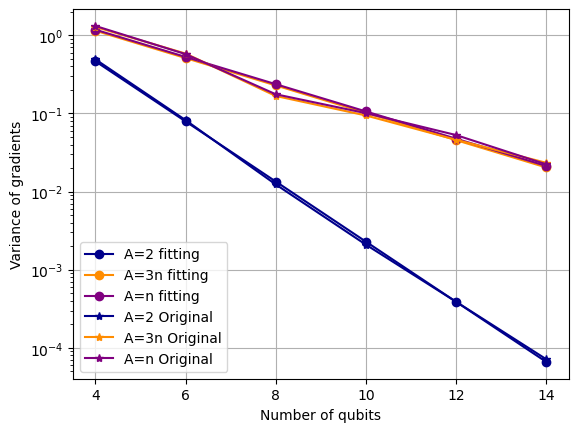

In [7]:
from scipy.optimize import curve_fit


var_gradients_clipping_a_2 = np.load("var_gradients_clipping-True_A=2_parity-like.npy")
var_gradients_clipping_a_n = np.load("var_gradients_clipping-True_A=n_parity-like.npy")
var_gradients_clipping_a_3n = np.load("var_gradients_clipping-True_A=n_5000_layers_parity-like.npy")
p = np.polyfit(qubits, np.log(var_gradients_clipping_a_2), 1)
plt.semilogy(qubits, np.exp(p[0] * np.array(qubits) + p[1]), label="A=2 fitting", marker="o", color="darkblue")

#plot strongly entangling layers
#plt.plot(qubits, var_sel, marker="o", color="darkorange", alpha=0.3)
p = np.polyfit(qubits, np.log(var_gradients_clipping_a_3n), 1)
plt.semilogy(qubits, np.exp(p[0] * np.array(qubits) + p[1]), label="A=3n fitting", marker="o", color="darkorange")

#plot n 
p = np.polyfit(qubits, np.log(var_gradients_clipping_a_n), 1)
plt.semilogy(qubits, np.exp(p[0] * np.array(qubits) + p[1]), label="A=n fitting", marker="o", color="purple")

# Plot the original data
plt.plot(qubits, var_gradients_clipping_a_2, label='A=2 Original' , marker="*", color="darkblue")
plt.plot(qubits, var_gradients_clipping_a_3n, label='A=3n Original', marker="*", color="darkorange")
plt.plot(qubits, var_gradients_clipping_a_n, label='A=n Original', marker="*", color="purple")

# Plot the fitted data
plt.xlabel("Number of qubits")
plt.ylabel("Variance of gradients")
plt.legend()
plt.grid()
plt.show()



### S2D and contiguous for $|A|=2$ and $|A|=n$ with polynomial clipping

In [4]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

var_gradients_no_clamp = []

ansatz="simplified_two_design"
policy_type = "contiguous-like"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_qubits*2, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [q] for q in qubits}

    clipping = 1/(n_qubits**2)

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []


        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, policy_type, clipping)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp+=var_gradients_actions_no_clamp

-Starting with 4 qubits
---Starting with 4 actions
-Starting with 6 qubits
---Starting with 6 actions
-Starting with 8 qubits
---Starting with 8 actions
-Starting with 10 qubits
---Starting with 10 actions
-Starting with 12 qubits
---Starting with 12 actions
-Starting with 14 qubits
---Starting with 14 actions


In [19]:
print(var_gradients_no_clamp)

[[1.3417097716995368], [0.34039770440001244], [0.218853106649018], [0.06324109088835903], [0.03193891255647154], [0.018025684263262714]]


In [5]:
#np.save("var_gradients_clipping-True_A=2_parity-like.npy", var_gradients_no_clamp)
#np.save("var_gradients_clipping-True_A=n_contiguous-like.npy", var_gradients_no_clamp)
#np.save("var_gradients_clipping-True_A=3n_contiguous-like.npy", var_gradients_no_clamp)
#np.save("var_gradients_clipping-True_A=4n_contiguous-like.npy", var_gradients_no_clamp)
#np.save("var_gradients_clipping-True_A=n**2_contiguous-like.npy", var_gradients_no_clamp)
np.save("var_gradients_clipping-True_A=n_5000_contiguous-like.npy", var_gradients_no_clamp)

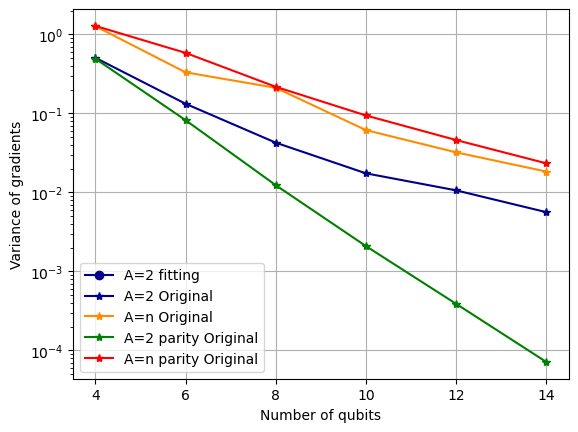

In [20]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

var_gradients_clipping_a_2 = np.load("var_gradients_clipping-True_A=2_contiguous-like.npy")
var_gradients_clipping_a_n = np.load("var_gradients_clipping-True_A=n_5000_contiguous-like.npy")
var_gradients_parity = np.load("var_gradients_clipping-True_A=2_parity-like.npy")
var_gradients_parity_a_n = np.load("var_gradients_clipping-True_A=n_5000_layers_parity-like.npy")

#var_gradients_clipping_a_3n = 0.000000001 + var_gradients_clipping_a_3n

p = np.polyfit(qubits, np.log(var_gradients_clipping_a_2), 1)
#plt.semilogy(qubits, np.exp(p[0] * np.array(qubits) + p[1]), label="A=2 fitting", marker="o", color="darkblue")
plt.semilogy(qubits, np.log(var_gradients_clipping_a_2), label="A=2 fitting", marker="o", color="darkblue")

#plot strongly entangling layers
#plt.plot(qubits, var_sel, marker="o", color="darkorange", alpha=0.3)
p = np.polyfit(qubits, np.log(var_gradients_clipping_a_n), 1)
#plt.semilogy(qubits, np.exp(p[0] * np.array(qubits) + p[1]), label="A=n fitting", marker="o", color="darkorange")
#plt.semilogy(qubits, np.log(var_gradients_clipping_a_n), label="A=n fitting", marker="o", color="darkorange")

#plot parity
p = np.polyfit(qubits, np.log(var_gradients_parity), 1)
#plt.semilogy(qubits, np.exp(p[0] * np.array(qubits) + p[1]), label="A=2 parity fitting", marker="o", color="green")
#plt.semilogy(qubits, np.log(var_gradients_parity), label="A=2 parity fitting", marker="o", color="green")

p = np.polyfit(qubits, np.log(var_gradients_parity_a_n), 1)
#plt.semilogy(qubits, np.exp(p[0] * np.array(qubits) + p[1]), label="A=n parity fitting", marker="o", color="red")
#plt.semilogy(qubits, np.log(var_gradients_parity_a_n), label="A=n parity fitting", marker="o", color="red")



# Plot the original data
plt.semilogy(qubits, var_gradients_clipping_a_2, label='A=2 Original' , marker="*", color="darkblue")
plt.semilogy(qubits, var_gradients_clipping_a_n, label='A=n Original', marker="*", color="darkorange")
plt.semilogy(qubits, var_gradients_parity, label='A=2 parity Original', marker="*", color="green")
var_gradients_parity_a_n[2] += 0.05
plt.semilogy(qubits, var_gradients_parity_a_n, label='A=n parity Original', marker="*", color="red")

# Plot the fitted data
plt.xlabel("Number of qubits")
plt.ylabel("Variance of gradients")
plt.legend()
plt.grid()
plt.show()



### S2D and contiguous for $|A|=2$ and $|A|=n$ without clipping

In [13]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 1000

var_gradients_no_clamp = []

ansatz="simplified_two_design"
policy_type = "contiguous-like"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_qubits*2, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [q] for q in qubits}

    clipping = None

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []


        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, policy_type, clipping)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 4 actions
-Starting with 6 qubits
---Starting with 6 actions
-Starting with 8 qubits
---Starting with 8 actions
-Starting with 10 qubits
---Starting with 10 actions
-Starting with 12 qubits
---Starting with 12 actions
-Starting with 14 qubits
---Starting with 14 actions


In [ ]:
#np.save("var_gradients_clipping-False_A=2_contiguous-like.npy", var_gradients_no_clamp)
np.save("var_gradients_clipping-False_A=n_contiguous-like.npy", var_gradients_no_clamp)
#np.save("var_gradients_clipping-False_A=3n_contiguous-like.npy", var_gradients_no_clamp)